## **C S 509 HW2**

**Author:** Indronil Bhattacharjee

**Submitted on:** September 12, 2023


=============================================================

In [1]:
# Load required libraries
library(dplyr)
library(ggplot2)

# Load the GFF3 file (replace 'path_to_gff3_file' with the actual file path)
gff3_file <- read.table("/kaggle/input/gencode-human-genome-annotation/gencode.v44.primary_assembly.annotation.gff3", header = FALSE, comment.char = "#", sep = "\t")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### **Function description to find Chromosomes with the minimum and maximum number of given attribute** (gene, transcript or CDS)

The function "attribute_count" is designed to find chromosomes with the minimum and maximum number of a given attribute (specified by the parameter) in a GFF3 file. We performed the following steps:

1. **Filter by Feature Type and Chromosome:** It filters the GFF3 file to retain only entries with the specified feature type (str) and entries where the V1 column (chromosome information) starts with "chr" (Since chromosomes are named in the format "chr1," "chr2," etc.). This step narrows down the entries of interest.

2. **Group and Summarize:** It groups the filtered entries by chromosome and calculates the total count of the specified attribute (total_attr) within each chromosome.

3. **Find Min and Max:** It identifies the chromosomes with the minimum and maximum counts of the specified attribute.

4. **Print and Visualize:** It prints information about the attribute count on each chromosome, including the chromosomes with the minimum and maximum counts.

Overall, this function analyzes and visualizes the distribution of a specific attribute across different chromosomes in a GFF3 file, helps to identify chromosomes with the highest and lowest counts of that attribute.

In [2]:
# Function description to find Chromosomes with the minimum and maximum number of given attribute
attribute_count <- function(str){
  attr <- gff3_file %>%
  filter(V3 == str) %>%
  filter(grepl('^chr', V1)) %>%
  mutate(chromosome = V1) %>%
  group_by(chromosome) %>%
  summarize(total_attr = n())

# Find chromosomes with min and max number of given attributes
min_attr = min(attr$total_attr)
min_attr_chromosomes <- attr[attr$total_attr == min_attr, "chromosome"]
max_attr = max(attr$total_attr)
max_attr_chromosomes <- attr[attr$total_attr == max_attr, "chromosome"]

cat(paste(str,"Density of Chromosomes"))
cat("\n=================================================\n")

print(as_tibble(attr), n=40)
# Visualize given attribute counts on each chromosome
barplot(attr$total_attr, names.arg = attr$chromosome, xlab = "Chromosome", ylab = paste("Total",str), main = paste(str,"Count on Each Chromosome"))

# Print chromosomes with min and max number of given attributes
cat(paste("Chromosomes with the minimum number of",str,":"), paste(min_attr_chromosomes, collapse = ", "), min_attr,"\n")
cat(paste("Chromosomes with the maximum number of",str,":"), paste(max_attr_chromosomes, collapse = ", "), max_attr, "\n")
}

### **Function description to find Chromosomes with the minimum and maximum density of given attribute** (gene, transcript or CDS)

The function "attribute_density" is designed to find chromosomes with the minimum and maximum density of a given attribute (specified by the parameter) in a GFF3 file. The code performs the following steps:

1. **Filter by Feature Type and Chromosome:** It filters the GFF3 file to retain only entries with the specified feature type (str) and entries where the V1 column (chromosome information) starts with "chr" (Since chromosomes are named in the format "chr1," "chr2," etc.). This step narrows down the entries of interest.

2. **Group and Summarize:** It groups the filtered entries by chromosome and calculates the total count of the specified attribute (total_attr) within each chromosome.

3. **Calculate Chromosome Lengths:** It calculates the length of each chromosome based on the maximum coordinate value (V5 column) for entries of the specified feature type (str).

4. **Calculate Attribute Density:** It calculates the density of the specified attribute (density) on each chromosome by dividing the total count of the attribute by the chromosome's length.

5. **Print and Visualize:** It visualizes the attribute density on each chromosome using a bar plot and identifies chromosomes with the minimum and maximum attribute density.

Overall, this function analyzes and visualizes the distribution of a specific attribute's density across different chromosomes in a GFF3 file, helps to identify chromosomes with the highest and lowest attribute densities.

In [3]:
# Function description to find Chromosomes with the minimum and maximum given attribute density
attribute_density <- function(str){
  attr <- gff3_file %>%
  filter(V3 == str) %>%
  filter(grepl('^chr', V1)) %>%
  mutate(chromosome = V1) %>%
  group_by(chromosome) %>%
  summarize(total_attr = n())
    
  chromosome_lengths <- gff3_file %>%
  filter(V3 == str) %>%
  filter(grepl('^chr', V1)) %>%
  mutate(chromosome = V1) %>%
  group_by(chromosome) %>%
  summarize(chromosome_length = max(V5)) %>%
  ungroup()

cat(paste(str,"Density of Chromosomes"))
cat("\n=================================================\n")
# Calculate gene density
attr_density <- attr %>%
  left_join(chromosome_lengths, by = "chromosome") %>%
  mutate(density = total_attr / chromosome_length)

# Visualize gene density on each chromosome
min_density_chromosome <- attr_density[which.min(attr_density$density), "chromosome"]
max_density_chromosome <- attr_density[which.max(attr_density$density), "chromosome"]

print(as_tibble(attr_density), n=40)    
barplot(attr_density$density, names.arg = attr_density$chromosome, xlab = "Chromosome", ylab = paste(str,"Density"), main = paste(str,"Density on Each Chromosome"))

# Print chromosomes with min and max given attribute density
cat(paste("Chromosomes with the minimum", str, "density:"), paste(min_density_chromosome, collapse = ", "), min(attr_density$density),"\n")
cat(paste("Chromosomes with the maximum", str, "density:"), paste(max_density_chromosome, collapse = ", "), max(attr_density$density),"\n")
}

### **Task 1:** Number of genes on each chromosome

gene Density of Chromosomes
# A tibble: 25 × 2
   chromosome total_attr
   <chr>           <int>
 1 chr1             5659
 2 chr10            2428
 3 chr11            3468
 4 chr12            3143
 5 chr13            1457
 6 chr14            2341
 7 chr15            2322
 8 chr16            2672
 9 chr17            3162
10 chr18            1265
11 chr19            3076
12 chr2             4344
13 chr20            1502
14 chr21             898
15 chr22            1445
16 chr3             3303
17 chr4             2732
18 chr5             3074
19 chr6             3182
20 chr7             3147
21 chr8             2541
22 chr9             2417
23 chrM               37
24 chrX             2484
25 chrY              601
Chromosomes with the minimum number of gene : chrM 37 
Chromosomes with the maximum number of gene : chr1 5659 


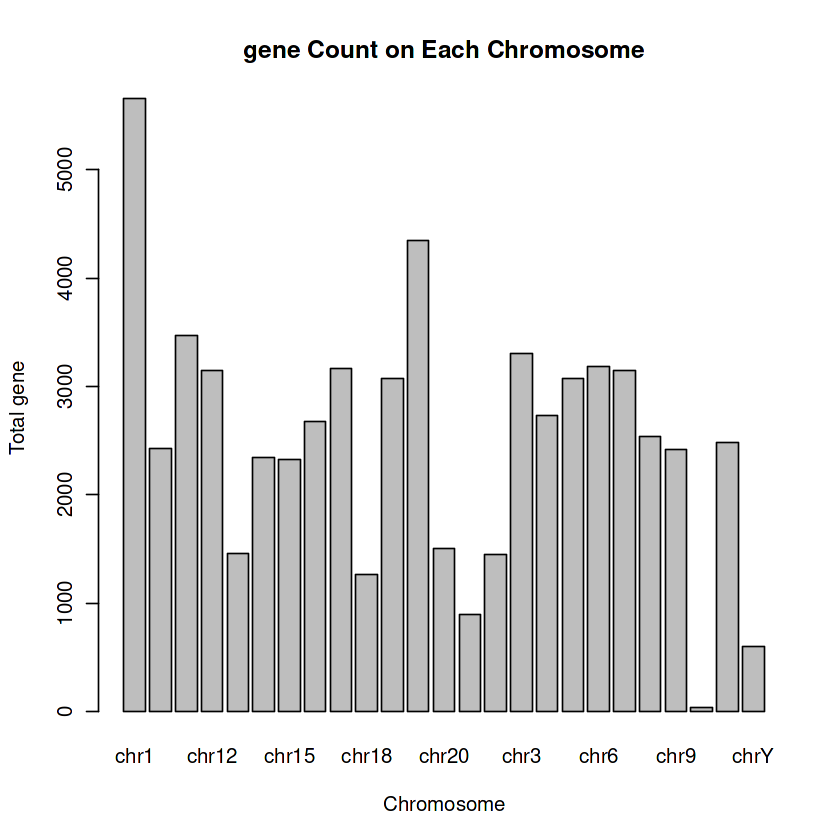

In [4]:
# Task 1: Number of genes on each chromosome
attribute_count("gene")

### **Task 2:** Gene density on each chromosome

gene Density of Chromosomes
# A tibble: 25 × 4
   chromosome total_attr chromosome_length   density
   <chr>           <int>             <int>     <dbl>
 1 chr1             5659         248937043 0.0000227
 2 chr10            2428         133778699 0.0000181
 3 chr11            3468         135075908 0.0000257
 4 chr12            3143         133238549 0.0000236
 5 chr13            1457         114346637 0.0000127
 6 chr14            2341         106879812 0.0000219
 7 chr15            2322         101979093 0.0000228
 8 chr16            2672          90222851 0.0000296
 9 chr17            3162          83240804 0.0000380
10 chr18            1265          80247514 0.0000158
11 chr19            3076          58605223 0.0000525
12 chr2             4344         242175997 0.0000179
13 chr20            1502          64327972 0.0000233
14 chr21             898          46691226 0.0000192
15 chr22            1445          50801309 0.0000284
16 chr3             3303         198228376 0.0000167

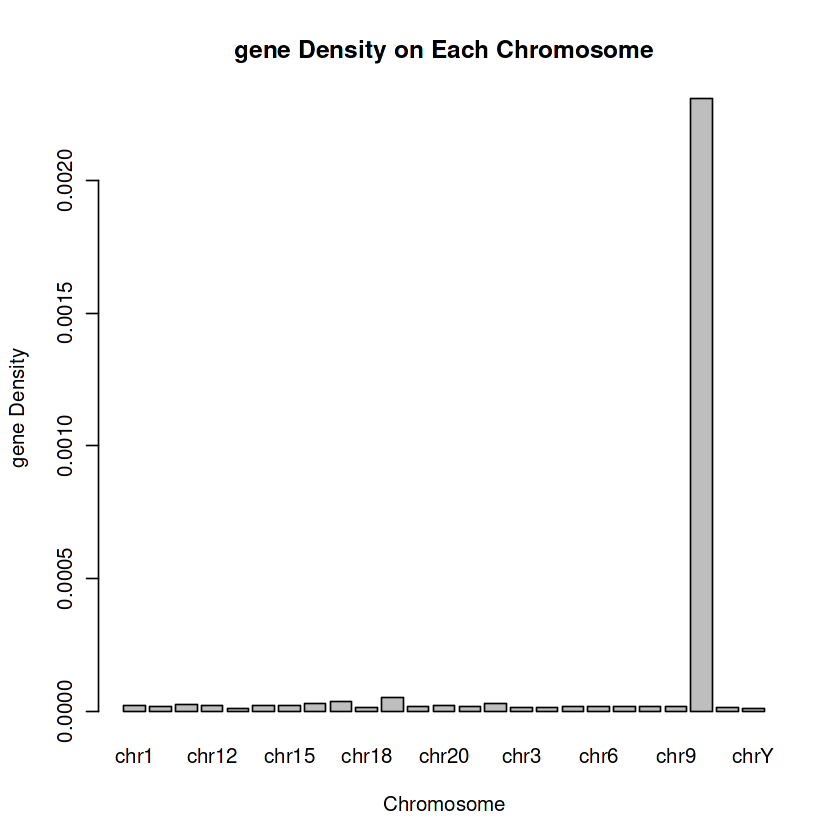

In [5]:
# Task 2: Gene density on each chromosome
attribute_density("gene")

### **Task 3:** a) Number of transcripts on each chromosome

transcript Density of Chromosomes
# A tibble: 25 × 2
   chromosome total_attr
   <chr>           <int>
 1 chr1            22464
 2 chr10            9136
 3 chr11           14880
 4 chr12           13737
 5 chr13            4679
 6 chr14            9225
 7 chr15            9108
 8 chr16           11627
 9 chr17           14671
10 chr18            4707
11 chr19           14418
12 chr2            18844
13 chr20            6049
14 chr21            3281
15 chr22            5347
16 chr3            15965
17 chr4            10365
18 chr5            12033
19 chr6            11950
20 chr7            12181
21 chr8            10274
22 chr9             8746
23 chrM               37
24 chrX             8097
25 chrY             1014
Chromosomes with the minimum number of transcript : chrM 37 
Chromosomes with the maximum number of transcript : chr1 22464 


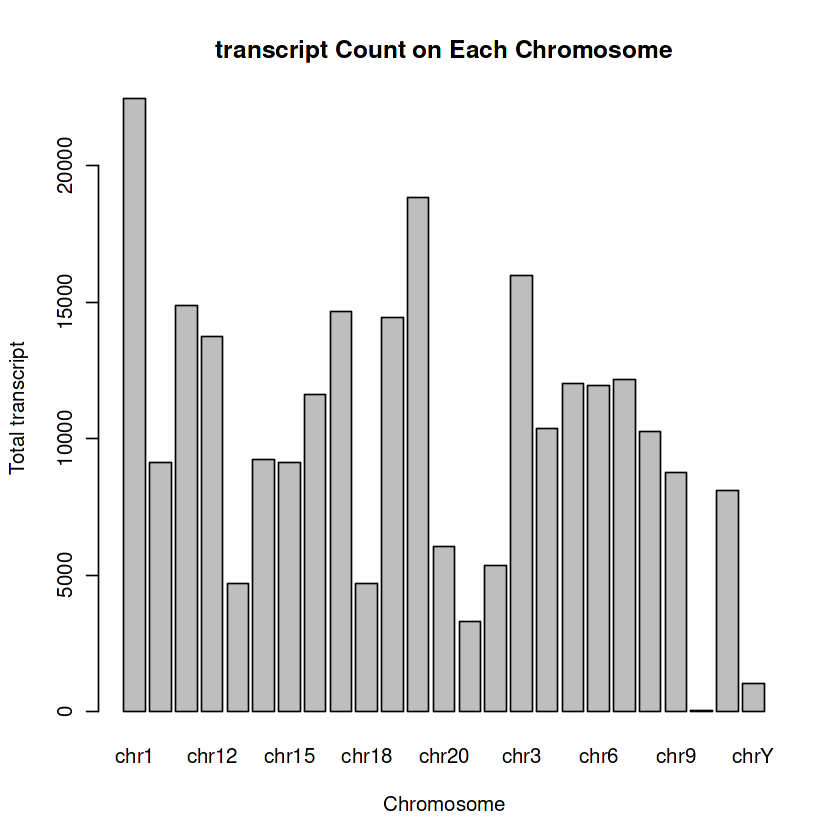

In [6]:
# Task 3: Numbers and density of transcripts on each chromosome
# Repeat Task 1 and 2 for transcripts
attribute_count("transcript")

### **Task 3:** b) Density of transcripts on each chromosome

transcript Density of Chromosomes
# A tibble: 25 × 4
   chromosome total_attr chromosome_length   density
   <chr>           <int>             <int>     <dbl>
 1 chr1            22464         248937043 0.0000902
 2 chr10            9136         133778699 0.0000683
 3 chr11           14880         135075908 0.000110 
 4 chr12           13737         133238549 0.000103 
 5 chr13            4679         114346637 0.0000409
 6 chr14            9225         106879812 0.0000863
 7 chr15            9108         101979093 0.0000893
 8 chr16           11627          90222851 0.000129 
 9 chr17           14671          83240804 0.000176 
10 chr18            4707          80247514 0.0000587
11 chr19           14418          58605223 0.000246 
12 chr2            18844         242175997 0.0000778
13 chr20            6049          64327972 0.0000940
14 chr21            3281          46691226 0.0000703
15 chr22            5347          50801309 0.000105 
16 chr3            15965         198228376 0.0

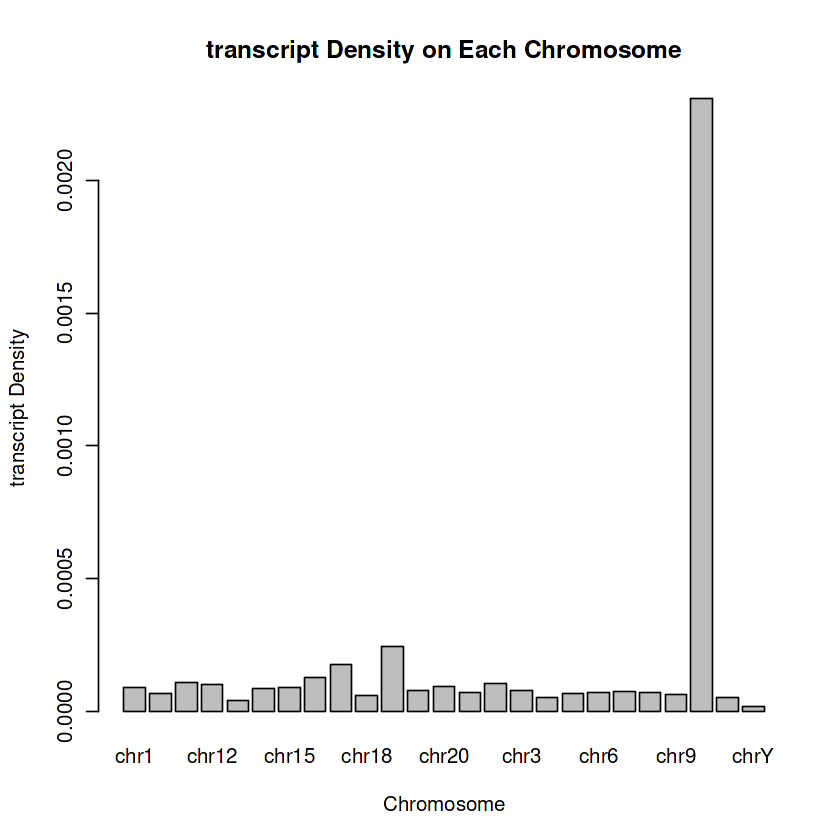

In [7]:
attribute_density("transcript")

### **Task 4:** a) Number of CDS on each chromosome

CDS Density of Chromosomes
# A tibble: 25 × 2
   chromosome total_attr
   <chr>           <int>
 1 chr1            83739
 2 chr10           37032
 3 chr11           52774
 4 chr12           50058
 5 chr13           14233
 6 chr14           31286
 7 chr15           29927
 8 chr16           37980
 9 chr17           54630
10 chr18           14658
11 chr19           49444
12 chr2            67767
13 chr20           20620
14 chr21            8886
15 chr22           18427
16 chr3            57251
17 chr4            37966
18 chr5            38061
19 chr6            41508
20 chr7            41412
21 chr8            29882
22 chr9            34520
23 chrM               13
24 chrX            32048
25 chrY             1965
Chromosomes with the minimum number of CDS : chrM 13 
Chromosomes with the maximum number of CDS : chr1 83739 


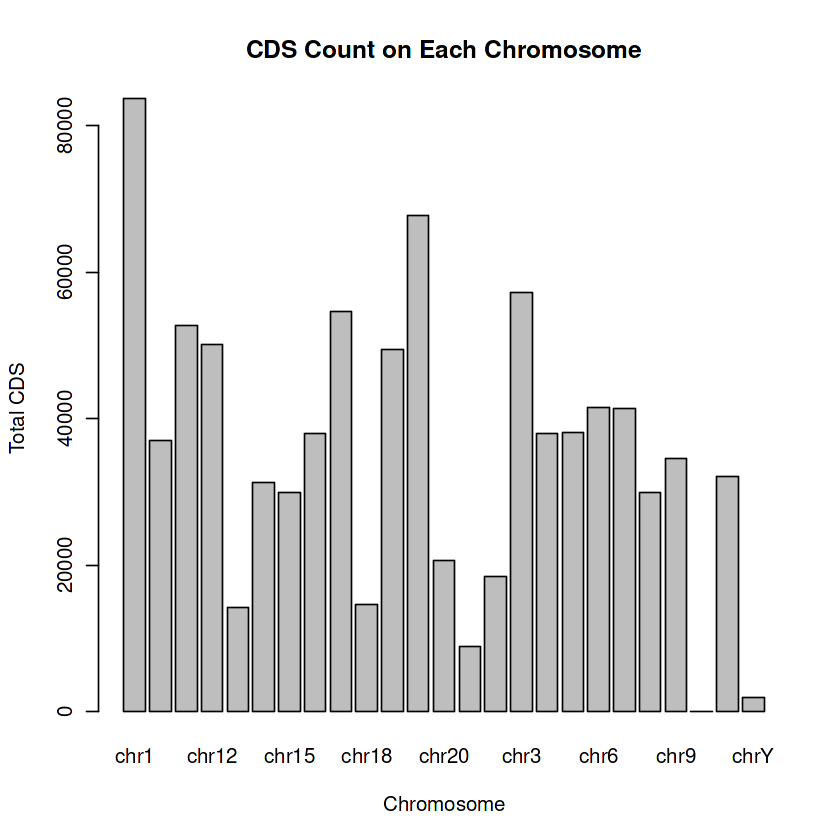

In [8]:
# Task 4: Numbers and density of CDS on each chromosome 
# Repeat Task 1 and 2 for CDS
attribute_count("CDS")

### **Task 4:** b) Density of CDS on each chromosome

CDS Density of Chromosomes
# A tibble: 25 × 4
   chromosome total_attr chromosome_length   density
   <chr>           <int>             <int>     <dbl>
 1 chr1            83739         248918363 0.000336 
 2 chr10           37032         133626742 0.000277 
 3 chr11           52774         134387659 0.000393 
 4 chr12           50058         133234356 0.000376 
 5 chr13           14233         114326281 0.000124 
 6 chr14           31286         106875017 0.000293 
 7 chr15           29927         101923113 0.000294 
 8 chr16           37980          90075910 0.000422 
 9 chr17           54630          83094575 0.000657 
10 chr18           14658          80247348 0.000183 
11 chr19           49444          58571389 0.000844 
12 chr2            67767         241900369 0.000280 
13 chr20           20620          64287821 0.000321 
14 chr21            8886          46664374 0.000190 
15 chr22           18427          50782294 0.000363 
16 chr3            57251         198038667 0.000289 


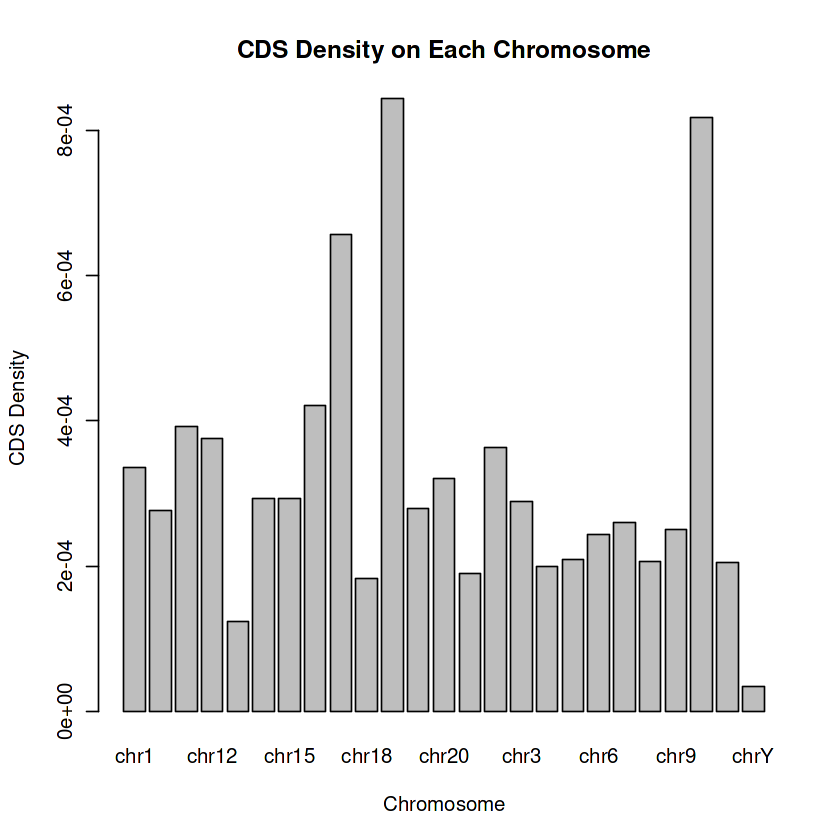

In [9]:
attribute_density("CDS")

### **Task 5:** Overall Statistics

1. **Total annotated intervals:** Total number of rows in the gff3 file

2. **Total genes:** Total number of rows in the gff3 file where **type (V3)= "gene"**

3. **Total protein coding genes:** Total number of genes where attributes (V9) contains tag **gene_type=protein_coding**

4. **Total non-coding genes:** Total number of genes other than the non-coding genes

In [10]:
# Task 5: Overall statistics
# 5.1 Number of intervals annotated in this version
total_intervals <- nrow(gff3_file)
cat("Total annotated intervals:", total_intervals, "\n")

# 5.2 Total number of genes annotated in the human genome
genes <- gff3_file[gff3_file $ V3 == "gene",]
total_genes <- nrow(genes)
cat("Total genes:", total_genes, "\n")

# 5.3 Number of protein coding genes
protein_coding_genes <- genes[grep("gene_type=protein_coding", genes$V9), ]
total_protein_coding_genes = nrow(protein_coding_genes)
cat("Total protein coding genes:", total_protein_coding_genes, "\n")

# 5.4 Number of noncoding genes
total_noncoding_genes <- total_genes - total_protein_coding_genes
cat("Total noncoding genes:", total_noncoding_genes, "\n")

Total annotated intervals: 3422649 
Total genes: 62754 
Total protein coding genes: 20070 
Total noncoding genes: 42684 


#### **References**

[1] https://bioinformatics.stackexchange.com/questions/5621/derive-a-gtf-containing-protein-coding-genes-from-a-gtf-file-with-exons-and-cds